# Echilibre pentru ecuații diferențiale

Cînd studiem sistemele dinamice un aspect deosebit de important este existența și comportamentul **punctelor de echilibru.** Pentru o ecuație diferențială $X'=f(X)$, punctele de echilibru sînt punctele $X_0$ pentru care $f(X_0)=0$. 

Pînă acum am studiat ecuațiile diferențiale folosind metoda Euler pentru simulări numerice, dar acest lucru are mari limitări. Fie ecuația 
$$
x'=r\left(1-\frac{X}{k}\right)\left(\frac{x}{a}-1\right)
$$
foarte asemănătoare cu ecuația logistică. Să simulăm comportamentul ei pentru cîteva valori ale parametrilor și ale valorii inițiale $x(0).$ Anume luăm $r=0.1,a=5,k=100$ și valorile inițiale $10,20,150$, respectiv $4$.

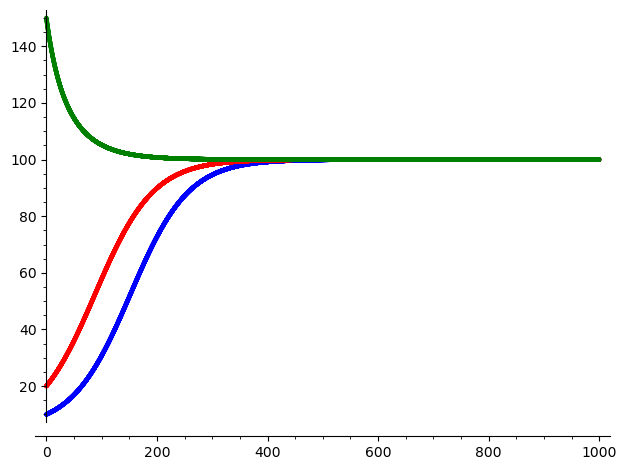

In [53]:
x=var('x')
r=0.1;a=5;k=100
f=r*(1-x/k)*(x/a-1)

sol1=desolve_odeint(f,[10],srange(0,1000,0.1),[x])
ts=list(map(lambda t:t/10, range(0,len(sol1)-1)))
vec1=list(zip(ts,list(sol1[:,0])))
p1=points(vec1)
sol2=desolve_odeint(f,[20],srange(0,1000,0.1),[x])
vec2=list(zip(ts,list(sol2[:,0])))
p2=points(vec2,color='red')
sol3=desolve_odeint(f,[150],srange(0,1000,0.1),[x])
vec3=list(zip(ts,list(sol3[:,0])))
p3=points(vec3,color='green')
(p1+p2+p3).show()

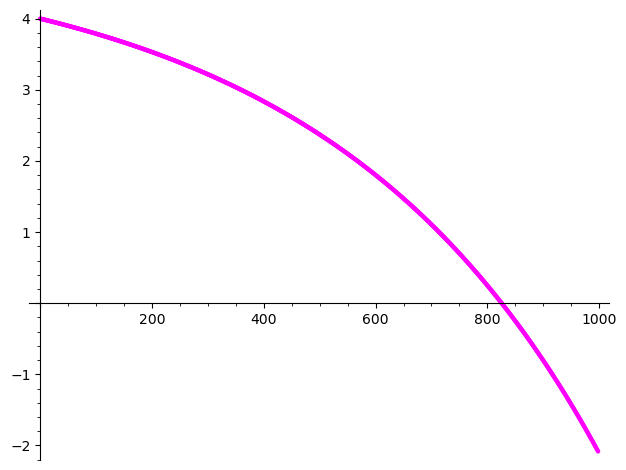

In [44]:
x=var('x')
r=0.1;a=5;k=100
f=r*(1-x/k)*(x/a-1)
sol4=desolve_odeint(f,[4],srange(0,100,0.1),[x])
vec4=list(zip(range(0,len(sol4)-1),list(sol4[:,0])))
p4=points(vec4,color='magenta')
(p4).show()

Se vede că în primele trei cazuri, comportarea este asemănătoare cu cea a ecuației logistice: dacă pornim cu o valoare mai mică decît $k$, atunci soluția va crește către el, iar dacă pornim cu o valoare mai mare, soluția va scădea către $k$. În cazul al patrulea se întimplă ceva diferit, soluția nu crește cum ne-am aștepta ci scade. 

Comportamentul nou provine din faptul că am luat $x(0)$ mai mică decît $a$ în acest caz, în vreme ce în primele trei cazuri ele au fost toate mai mari decît $a$.

Cum nu putem simula pentru toate valorile inițiale este important să găsim o metodă să determinăm comportamentul soluțiilor. în cazul dimensiunii $1$, o astfel de metodă există. Pentru cazul multi-dimensional această metodă oferă informații importante, chiar dacă nu complete. 

Primul pas constă în a determina punctele în care sistemul nu se schimbă, numite **punctele de echilibru**. Aceast sînt puncte pentru care $x'=0$ (deoarece am văzut că derivata unei constante este $0$, și reciproc doar funcțiile constante au această proprietate). Practic pentru ecuația $x'=f(x)$, trebuie să găsim valorile lui $x$ pentru care $f(x)=0$. De exemplu pentru ecuația noastră punctele de echilibru satisfac
$$
\begin{eqnarray}
1-\frac{x}{k}=0 & \Longrightarrow & x=k \text{ și } \\
1-\frac{x}{a}=0 & \Longrightarrow & x=a. 
\end{eqnarray}
$$


## Stabilitatea echilibrelor - Metoda punctului intermediar

După ce am determinat punctele de echilibru este important să decidem ce se întimplă în jurul acestui punct: dacă pornim din apropierea echilibrului răminem în apropiere sau ne îndepărtăm? De asemenea soluțiile care pornesc dintr-un punct oarecare se apropie de una dintre soluțiile constante? 

Matematic vorbim de **stabilitatea** echilibrelor. Un echilbru este stabil dacă pornind din apropierea lui rămînem în apropiere și este instabil dacă pornind din apropierea echilibrului ne îndepărtăm.

Pentru a studia stabilitatea unui echilibru trebuie să vedem semnul funcției $f$. Să luăm ca exemplu ecuația logistică 
$$
x'=rx\left(1-\frac{x}{k}\right).
$$
Punctele sale de echibru sînt $x_0=0$ și $x_1=k>0$. Pentru valori ale lui $x$ între $0$ și $k$ $f(x) > 0,$ iar pentru $x > k,$
$f(x) < 0$. Din desen devine imediată stabilitatea: dacă vectorii indepărtează punctul de punctul de echilibru, atunci acesta este instabil, iar dacă îl apropie este stabil.

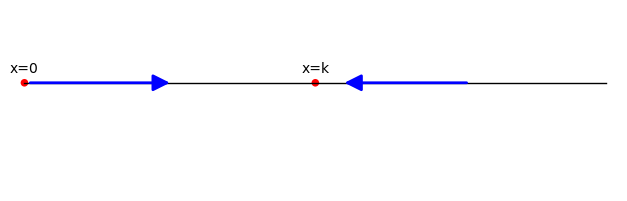

In [33]:
p1=plot(1,(0,10),color='black',axes=False)
p2=point((0,1),size=30,color='red')
p3=text('x=0',(0,1.2),color='black')
p4=point((5,1),size=30,color='red')
p5=text('x=k',(5,1.2),color='black')
p6=arrow((0.1,1),(2.5,1))
p7=arrow((7.6,1),(5.5,1))
(p1+p2+p3+p4+p5+p6+p7).show(aspect_ratio=1.2,ymin=-0.5,ymax=2)

Nu este întotdeauna la fel de ușor ca în cazul ecuației logistice să determinăm semnul funcției care definește ecuația diferențială. Să luăm următoarea ecuație, bazată pe modelul logistic, unde o parte din populație este scoasă spre exemplu prin vînătoare sau pescuit:
$$
x'=0,2 x\left(1-\frac{x}{1000}\right)-0,1x.
$$
Se poate cu ușurință vedea că cele două echilibre sînt $x=0$ și $x=500$. Pentru a găsi semnul lui $x'$ pe fiecare interval $(0,500)$, respectiv $(500,\infty)$ este suficient să luăm cîte un punct în fiecare interval și să vedem semnul funcției în acest punct.  Astfel avem o figură similară cu cea precedentă. 

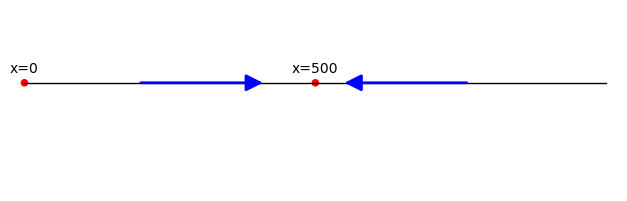

In [34]:
p1=plot(1,(0,10),color='black',axes=False)
p2=point((0,1),size=30,color='red')
p3=text('x=0',(0,1.2),color='black')
p4=point((5,1),size=30,color='red')
p5=text('x=500',(5,1.2),color='black')
p6=arrow((2,1),(4.1,1))
p7=arrow((7.6,1),(5.5,1))
(p1+p2+p3+p4+p5+p6+p7).show(aspect_ratio=1.2,ymin=-0.5,ymax=2)

Am folosit implicit faptul că o funcție continuă nu poate schimba semnul fără să treacă prin $0$. Aceasta este teorema valorii intermediare. Noi cunoaștem toate zerourile, funcția $x'$ nu poate schimba semnul fără să treacă prin echilibru.

## Stabilitatea echilibrelor: analiza liniară a stabilității

Metoda grafică are succes în dimensiune $1$, dar în dimensiune mai mare nu funcționează așa de bien. Studiem dinnou ecuația logistică 
$$
x'=x\left(1-\frac{x}{k}\right).
$$
Facem graficul funcției $f(x)=x\left(1-\frac{x}{k}\right)$ și vedem că punctele de echilibru sînt cele în care graficul taie axa $Ox$. Pentru $x=0$ funcția trece de la negativ la pozitiv, deci crește, iar pentru $x=k$ din contră trece de la pozitiv la negativ, decit scade. Prin urmare panta tangentei în primul echilibru este pozitivă, iar în cel de-al doilea panta este negativă.

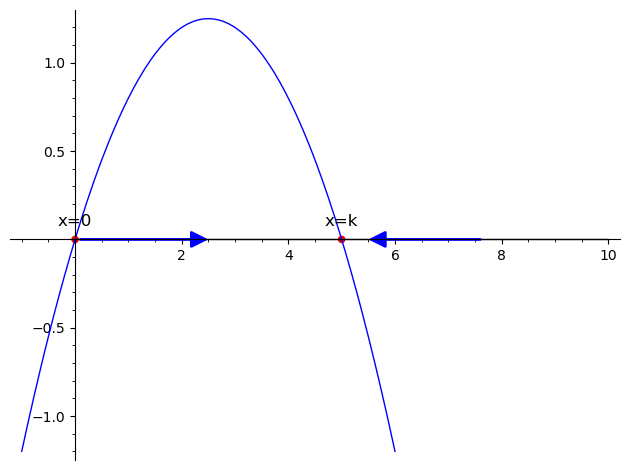

In [48]:
x=var('x')
k=5
f(x)=x*(1-x/k)
p1=plot(0,(0,10),color='black')
p2=point((0,0),size=30,color='red')
p3=text('x=0',(0,0.1),color='black',fontsize=12)
p4=point((5,0),size=30,color='red')
p5=text('x=k',(5,0.1),color='black',fontsize=12)
p6=arrow((0.1,0),(2.5,0))
p7=arrow((7.6,0),(5.5,0))
p8=plot(f,(-1,k+1))
(p8+p1+p2+p3+p4+p5+p6+p7).show()

Calculăm derivata funcției:
$$
f'(x)=1-\frac{2x}{k}.
$$
Deci $f'(0)=1 > 0$ și $f'(k)=-1 < 0$. Semnul derivatei ne indică stabilitatea unui echilibru $x^*$:
 - dacă $f'(x^*) > 0,$ atunci echilibrul este instabil;
 - dacă $f'(x^*) < 0,$ atunci echilibrul este stabil. 
 
 Aceasta este o primă aplicației a **teoremei Hartman-Grobman**: comportarea unei ecuații diferențiale în jurul unui punct de echilibru este determinată de aproximarea sa liniară. 

## Efectul Allee

În anumite populații s-a constat următorul fenomen destul de neintuitiv: pentru anumite populații supravițuirea nu are loc decît pentru un anumit număr minim de indivizi. Dacă numărul de indivizi scade sub un anumit prag, atunci populația intră în declin, putînd chiar dispărea. Acesta este *efectul Alle*.

Efectul Allee se modelează modificînd ecuația logistică într-o formă pe care am mai întilnit-o:
$$
x'=rx\left(1-\frac{x}{k}\right)\left(\frac{x}{a}-1\right).
$$

Avem trei puncte de echilibru, anume $x=0$, $x=k$ și $x=a$. Pentru a studia stabilitatea cu ajutorul metodei punctului intermediar luăm cîte un punct în intervalele $(0,k)$, $(a,k)$ și $(k,\infty)$ (am presupus $a < k$). 

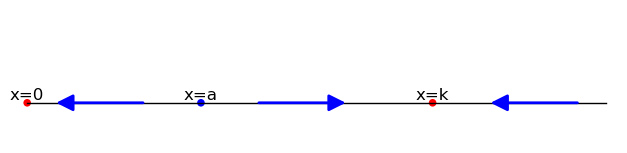

In [62]:
x=var('x')
k=7;a=3
f(x)=x*(1-x/k)*(x/a-1)
p1=plot(0,(0,10),color='black',axes=False)
p2=point((0,0),size=30,color='red')
p3=text('x=0',(0,0.1),color='black',fontsize=12)
p4=point((a,0),size=30,color='blue')
p5=text('x=a',(a,0.1),color='black',fontsize=12)
p8=point((k,0),size=30,color='red')
p9=text('x=k',(k,0.1),color='black',fontsize=12)
p6=arrow((2,0),(0.5,0))
p7=arrow((4,0),(5.5,0))
p10=arrow((9.5,0),(8,0))
(p1+p2+p3+p4+p5+p6+p7+p8+p9+p10).show(aspect_ratio=1.3,ymin=-0.5,ymax=1.2)